In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import random
from classes.vectorizer import Vectorizer
from classes.engine import Engine
from keras.utils import to_categorical

In [2]:
import sklearn.metrics as mtr
import matplotlib.pyplot as plt

In [3]:
with open("datasets/processed/train_val_test/train_emotion_dataset.pickle", "rb") as r:
    train_emotion_df = pickle.load(r)
with open("datasets/processed/train_val_test/val_emotion_dataset.pickle", "rb") as r:
    val_emotion_df = pickle.load(r)
with open("datasets/processed/train_val_test/test_emotion_dataset.pickle", "rb") as r:
    test_emotion_df = pickle.load(r)

In [4]:
V = Vectorizer()
E = Engine()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fabio/Documents/Progetto IR/models/tokenizer'

In [ ]:
y_train_k = to_categorical(train_emotion_df.sentiment.values)
y_test_k = to_categorical(test_emotion_df.sentiment.values)

y_train = train_emotion_df.sentiment.values
y_test = test_emotion_df.sentiment.values

In [ ]:
train_emotion_df.head(10)

,sentiment,text
0,4,ug full of cold and in a dark pub want to go o...
1,3,ginjagin i think you re pretty i am sorry they...
2,4,robertholiday mmichelle35 missjo_ladie gmorne ...
3,6,yourboogiegirl dude same it hurt
4,3,just get up and go to get ready to go to meado...
5,8,can not go to sleeeeeep whyyyyy
6,1,hmmosaka last show todayvery sad i can decode ...
7,4,bradfordshimp the least i can do for you is re...
8,5,thank god for after elton for allow me to see ...
9,8,burrrbank ah wait we can only go if you can ge...


In [ ]:
X_train_pad = V.vectorize_keras_df(train_emotion_df, 'text')
X_test_pad = V.vectorize_keras_df(test_emotion_df, 'text')

In [ ]:
E.fit(X_train_pad, y_train)

Training: Logistic Regression


/Users/fabio/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training: MLP
Training: Decision Tree
Training: Random Forest
Training: K-Nearest Neighbors


In [ ]:
E.predict(X_test_pad, y_test, y_test_k)

Predicting: Logistic Regression


/Users/fabio/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fabio/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Predicting: MLP
Predicting: Decision Tree
Predicting: Random Forest
Predicting: K-Nearest Neighbors
Predicting: RNN LSTM


2022-12-02 09:41:35.605469: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-02 09:41:36.111128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 09:41:36.287301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 09:41:36.302732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 09:41:37.188110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 09:41:37.200166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 09:41:38.044708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114

120/120 [==============================] - 37s 280ms/step


2022-12-02 09:42:12.826356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 09:42:13.011993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 09:42:13.024970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 09:42:13.879444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 09:42:13.890685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 09:42:14.769581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-02 09:42:14.782030: I tensorflow/core/grappler/optimizers/cust

120/120 [==============================] - 37s 284ms/step - loss: 2.1129 - accuracy: 0.3071


,Accuracy,Avg Precision (macro),Avg Recall (macro),Avg F1-score (macro),Avg Precision (weighted),Avg Recall (weighted),Avg F1-score (weighted)
Model,,,,,,,
Logistic Regression,0.254712,0.210287,0.126583,0.079188,0.267017,0.254712,0.156971
MLP,0.262827,0.175594,0.132326,0.085666,0.205055,0.262827,0.166659
Decision Tree,0.179843,0.126005,0.127276,0.126189,0.181283,0.179843,0.180006
Random Forest,0.251832,0.133022,0.138277,0.116635,0.193228,0.251832,0.196658
K-Nearest Neighbors,0.182199,0.120863,0.123943,0.118914,0.169798,0.182199,0.173093
RNN LSTM,0.307068,0.297926,0.223032,0.193635,0.307216,0.307068,0.248814


In [ ]:
cross_val = E.cross_val


In [ ]:
predictions = E.predictions

In [ ]:
CM = {}
for k, v in predictions.items():
    CM[k] = mtr.confusion_matrix(y_test, v)

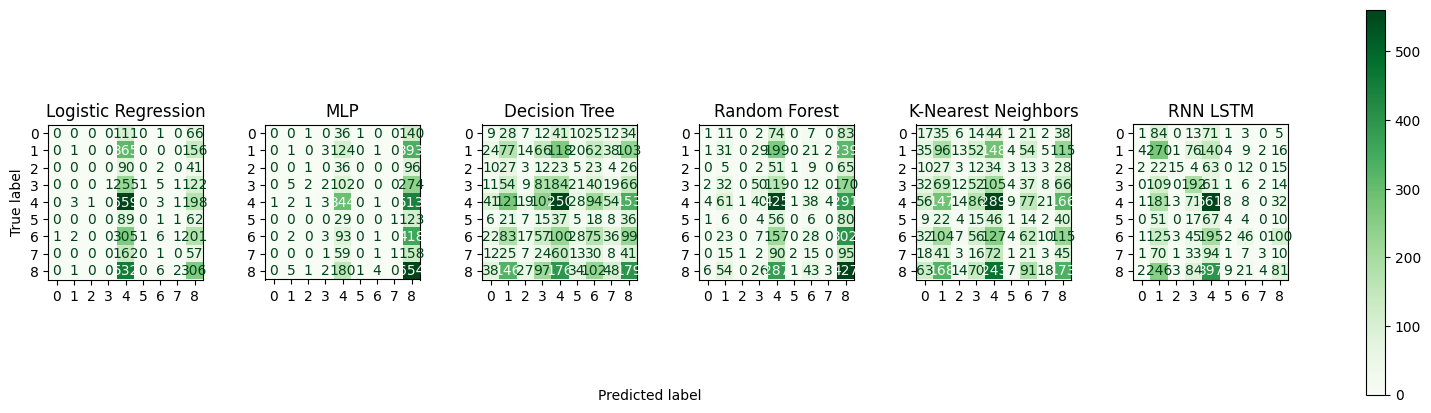

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


f, axes = plt.subplots(1, 6, figsize=(20, 5))

for i, (k,v) in enumerate(CM.items()):
    disp = ConfusionMatrixDisplay(v,
                                  display_labels=set(y_test))
    disp.plot(ax=axes[i], cmap='Greens')
    disp.ax_.set_title(k)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
with open("models/logistic_regression.model", "wb") as w:
    pickle.dump(E.models["Logistic Regression"], w)

with open("models/decision_tree.model", "wb") as w:
    pickle.dump(E.models["Decision Tree"], w)

with open("models/random_forest.model", "wb") as w:
    pickle.dump(E.models["Random Forest"], w)

with open("models/k_nearest_neighbors.model", "wb") as w:
    pickle.dump(E.models["K-Nearest Neighbors"], w)

with open("models/MLP.model", "wb") as w:
    pickle.dump(E.models["MLP"], w)